<a href="https://colab.research.google.com/github/amyyeeunchu/ObesityRegression/blob/main/Lasso_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


C value: 0.001
Cross-Validation Accuracy: 0.3789
Test Accuracy: 0.4244
Selected features (indices): []


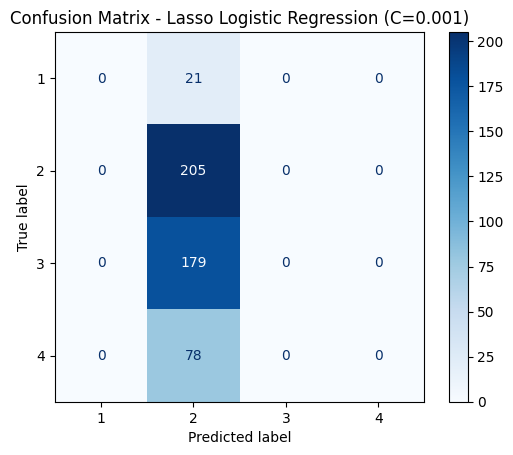


C value: 0.01
Cross-Validation Accuracy: 0.6149
Test Accuracy: 0.7019
Selected features (indices): [1 5 6]


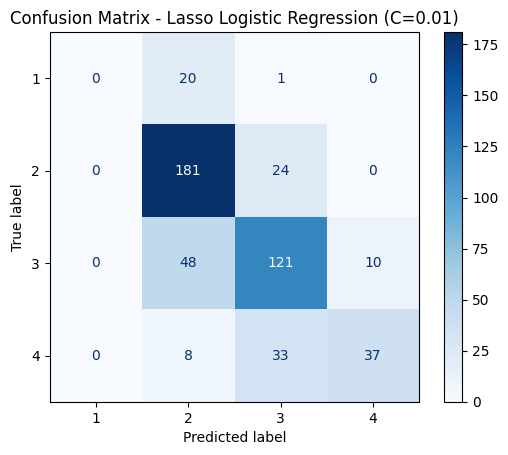


C value: 0.1
Cross-Validation Accuracy: 0.7107
Test Accuracy: 0.7226
Selected features (indices): [ 0  1  2  3  4  5  6  7  8  9 10 11 12]


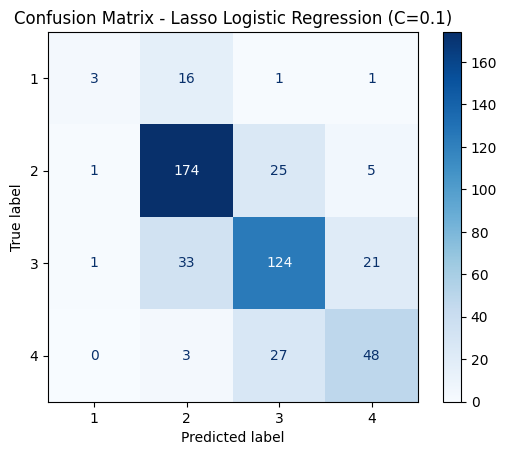


C value: 1
Cross-Validation Accuracy: 0.7275
Test Accuracy: 0.7350
Selected features (indices): [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]


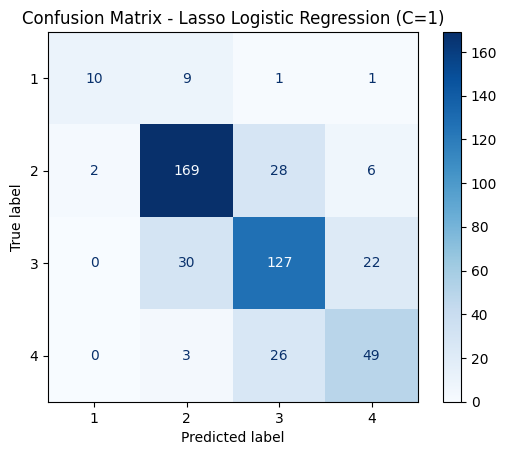

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load cleaned dataset
file_path = 'cleaned_dataset.xlsx'
df = pd.read_excel(file_path)

# Define feature matrix and target column
X = df.drop(columns=['Class'])  # All columns except 'Class' are features
y = df['Class']  # Target column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# List of different C values (regularization strength)
C_values = [0.001, 0.01, 0.1, 1, 10, 100]

# Initialize an empty list to store results
results = []

# Initialize K-fold cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Loop over each C value and train the model
for C_value in C_values:
    # Implement Lasso Logistic Regression with multiclass
    lasso_lr = LogisticRegression(penalty='l1', solver='saga', max_iter=1000, C=C_value)

    # Perform K-fold Cross-Validation
    cv_scores = cross_val_score(lasso_lr, X_train, y_train, cv=kfold, scoring='accuracy')

    # Calculate the average accuracy from cross-validation
    avg_accuracy = np.mean(cv_scores)

    # Train the model using training set
    lasso_lr.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = lasso_lr.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Results
    results.append((C_value, avg_accuracy, accuracy, conf_matrix))
    selected_features = np.unique(np.where(lasso_lr.coef_ != 0)[1])
    print(f"\nC value: {C_value}")
    print(f"Cross-Validation Accuracy: {avg_accuracy:.4f}")
    print(f"Test Accuracy: {accuracy:.4f}")
    print(f"Selected features (indices): {selected_features}")

    # Confusion Matrix Display
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=lasso_lr.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - Lasso Logistic Regression (C={C_value})")
    plt.show()

# summary
print("\nSummary of Results:")
for result in results:
    C_value, avg_accuracy, accuracy, _ = result
    print(f"C={C_value}: CV Accuracy = {avg_accuracy:.4f}, Test Accuracy = {accuracy:.4f}")
